### Ejercicio 4 Análisis Exploratorio

Fraude Detection

In [3]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


In [8]:
def reduce_mem_usage(df):

    start_mem = df.memory_usage(index=True, deep=True).sum() / 1024**2
    start_mem_GB = df.memory_usage(index=True, deep=True).sum() / 1024**3
    print(f'Initial memory usage of dataframe is {start_mem:.2f} MB/{start_mem_GB:.2f} GB')
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage(index=True, deep=True).sum() / 1024**2
    end_mem_GB = df.memory_usage(index=True, deep=True).sum() / 1024**3
    reduction = 100 * (start_mem - end_mem) / start_mem
    print(f'Memory usage after optimization is: {end_mem:.2f} MB/{end_mem_GB:.2f} GB')
    print(f'Decreased by {reduction:.1f}%')
    
    return df



In [5]:
import pandas as pd

tra_identy = pd.read_csv("train_identity.csv")
tra_transac = pd.read_csv("train_transaction_new.csv")
tra_identy =tra_identy.iloc[:100000]

Se importan los datos y se utilizan los 100000 primeros registros


In [9]:


merged_df = pd.merge(tra_identy, tra_transac, on='TransactionID',how="left")
print("Numero de observaciones",len(merged_df))


Numero de observaciones 100000


Se hace la union de tablas y se muestra la catidad de registros

In [12]:
merged_df.head(1000)



,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2992177,-5.0,141390.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,2992184,-5.0,80477.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,2992188,-5.0,38346.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,2992189,-5.0,70540.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,1.0,50.0,50.0,50.0,0.0,0.0,0.0,50.0,50.0,50.0


In [13]:
merged_df.describe()

c:\Users\Edward Morales\miniconda3\envs\ml_venv\lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
c:\Users\Edward Morales\miniconda3\envs\ml_venv\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Edward Morales\miniconda3\envs\ml_venv\lib\site-packages\pandas\core\nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
c:\Users\Edward Morales\miniconda3\envs\ml_venv\lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
c:\Users\Edward Morales\miniconda3\envs\ml_venv\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Edward Morales\miniconda3\envs\ml_venv\lib\site-packa

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,1.000000e+05,100000.0,97718.0000,44789.000000,44789.000000,95108.0,95108.0,3616.000000,3616.000000,51171.000000,...,31660.000000,31660.0,31660.0,31660.0,31660.0,31660.0,31660.0,31660.0,31660.0,31660.0
mean,3.134017e+06,NaN,160730.6875,0.067688,-0.057220,NaN,NaN,14.171875,-inf,0.111938,...,0.133911,inf,inf,inf,inf,inf,inf,inf,inf,inf
std,1.004876e+05,0.0,142771.5000,0.590332,0.689453,0.0,0.0,11.179688,25.734375,0.956055,...,0.605957,inf,inf,inf,inf,inf,inf,inf,inf,inf
min,2.987004e+06,-100.0,36.0000,-11.000000,-28.000000,-72.0,-100.0,-46.000000,-100.000000,-36.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3.056132e+06,-10.0,67806.5000,0.000000,0.000000,0.0,-5.0,6.000000,-49.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,3.100498e+06,-5.0,118265.0000,0.000000,0.000000,0.0,0.0,14.000000,-34.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,3.214332e+06,-5.0,205381.7500,0.000000,0.000000,1.0,0.0,22.000000,-24.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,3.356008e+06,0.0,999595.0000,10.000000,0.000000,52.0,0.0,61.000000,0.000000,25.000000,...,11.000000,20752.0,32256.0,21248.0,3100.0,3200.0,3100.0,8248.0,8248.0,8248.0


Un resumen de los datos, con su catidad, media, estandat, minimo, maximo y cuartiles, Ahora hay muchos datos asi que se analisatan despues del procesamiento

In [155]:
all_data_NA = merged_df.isna()
pd.concat([merged_df,all_data_NA], axis=1, sort = False, keys = ['Train NA', 'Test NA', 'All NA'])

C:\Users\Edward Morales\AppData\Local\Temp\ipykernel_17984\434832864.py:2: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  pd.concat([merged_df,all_data_NA], axis=1, sort = False, keys = ['Train NA', 'Test NA', 'All NA'])


Train NA                                                            \
      TransactionID id_01     id_02 id_03 id_04 id_05 id_06 id_07 id_08 id_09   
0           2987004   0.0   70787.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1           2987008  -5.0   98945.0   NaN   NaN   0.0  -5.0   NaN   NaN   NaN   
2           2987010  -5.0  191631.0   0.0   0.0   0.0   0.0   NaN   NaN   0.0   
3           2987011  -5.0  221832.0   NaN   NaN   0.0  -6.0   NaN   NaN   NaN   
4           2987016   0.0    7460.0   0.0   0.0   1.0   0.0   NaN   NaN   0.0   
...             ...   ...       ...   ...   ...   ...   ...   ...   ...   ...   
99995       3355991 -25.0  205503.0   0.0   0.0   0.0   0.0   NaN   NaN   0.0   
99996       3356004  -5.0  229851.0   NaN   NaN   0.0   0.0   NaN   NaN   NaN   
99997       3356006  -5.0  354127.0   NaN   NaN   0.0   0.0   NaN   NaN   NaN   
99998       3356007  -5.0  104673.0   0.0   0.0   0.0   0.0   NaN   NaN   0.0   
99999       3356008  -5.0  192459.0   NaN   NaN   2.0  -1.0   NaN   NaN   NaN   

       ... Test NA                                                          \
       ...    V330   V331   V332   V333   V334   V335   V336   V337   V338   
0      ...   False  False  False  False  False  False  False  False  False   
1      ...   False  False  False  False  False  False  False  False  False   
2      ...    True   True   True   True   True   True   True   True   True   
3      ...    True   True   True   True   True   True   True   True   True   
4      ...   False  False  False  False  False  False  False  False  False   
...    ...     ...    ...    ...    ...    ...    ...    ...    ...    ...   
99995  ...    True   True   True   True   True   True   True   True   True   
99996  ...    True   True   True   True   True   True   True   True   True   
99997  ...    True   True   True   True   True   True   True   True   True   
99998  ...    True   True   True   True   True   True   True   True   True   
99999  ...    True   True   True   True   True   True   True   True   True   

              
        V339  
0      False  
1      False  
2       True  
3       True  
4      False  
...      ...  
99995   True  
99996   True  
99997   True  
99998   True  
99999   True  

[100000 rows x 868 columns]

Esta matriz muestra la cantidad de datos faltantes que hay, esto puede verse mejor en la siguiente grafica

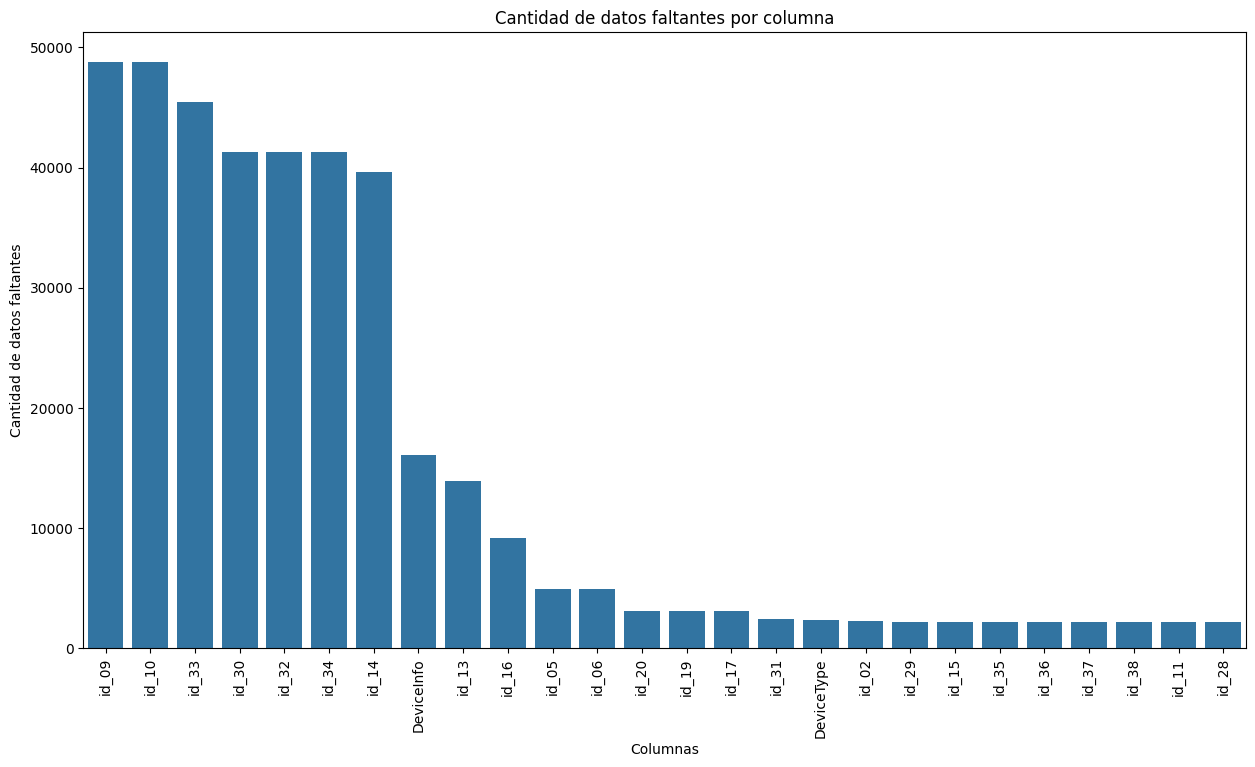

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la cantidad de datos NA por columna
all_data_NA = merged_df.isna().sum()

# Filtrar solo las columnas que tienen datos NA
all_data_NA = all_data_NA[all_data_NA > 0].sort_values(ascending=False)

# Graficar
plt.figure(figsize=(15, 8))
sns.barplot(x=all_data_NA.index, y=all_data_NA.values)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visualización
plt.ylabel('Cantidad de datos faltantes')
plt.xlabel('Columnas')
plt.title('Cantidad de datos faltantes por columna')
plt.show()


Por cada una de las columnas muestra cuantos de sus datos estan vacios, Asi que desidi eliminar aquellas columnas que tengan más del 50% de sus datos vacios

In [14]:
missing_percentage = (merged_df.isna().sum() / len(merged_df)) 
print(missing_percentage)
# Iterar sobre cada columna y eliminar aquellas con más del 50% de datos nulos
cols_to_drop = [col for col in merged_df.columns if missing_percentage[col] > 0.50]

# Eliminar las columnas
merged_df.drop(columns=cols_to_drop, inplace=True)

TransactionID    0.00000
id_01            0.00000
id_02            0.02282
id_03            0.55211
id_04            0.55211
                  ...   
V335             0.68340
V336             0.68340
V337             0.68340
V338             0.68340
V339             0.68340
Length: 434, dtype: float64


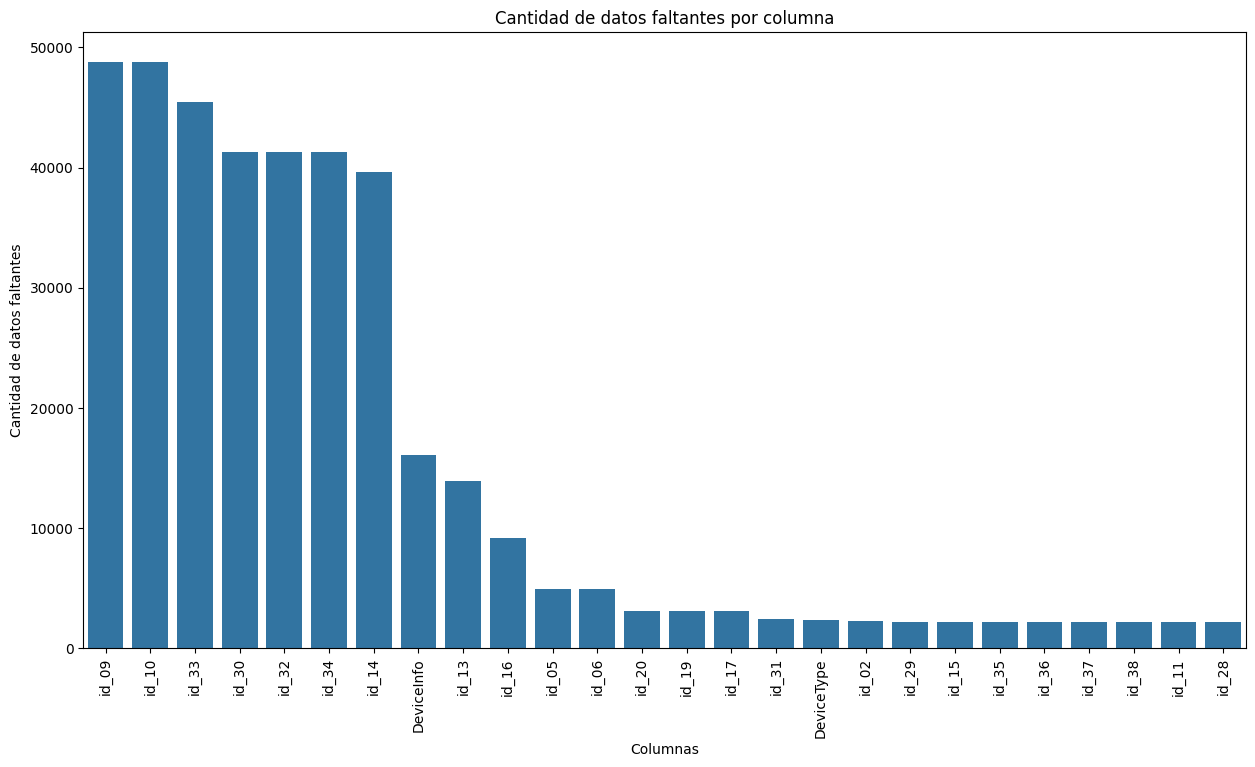

In [17]:
# Calcular la cantidad de datos NA por columna
all_data_NA = merged_df.isna().sum()

# Filtrar solo las columnas que tienen datos NA
all_data_NA = all_data_NA[all_data_NA > 0].sort_values(ascending=False)

# Graficar
plt.figure(figsize=(15, 8))
sns.barplot(x=all_data_NA.index, y=all_data_NA.values)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visualización
plt.ylabel('Cantidad de datos faltantes')
plt.xlabel('Columnas')
plt.title('Cantidad de datos faltantes por columna')
plt.show()

Ahora se puede ver más claramente los datos y cuantas registros tienen vacios, porcedo a codificar las variables categoricas

In [168]:
merged_df.head()

,TransactionID,id_01,id_02,id_05,id_06,id_09,id_10,id_11,id_12,id_13,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,0.0,-5.0,NaN,NaN,100.0,NotFound,49.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,100.0,NotFound,52.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,0.0,-6.0,NaN,NaN,100.0,NotFound,52.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,1.0,0.0,0.0,0.0,100.0,NotFound,NaN,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [18]:
# Seleccionar solo columnas no numéricas
non_numeric_df = merged_df.select_dtypes(exclude=[np.number])

# Mostrar las columnas no numéricas
non_numeric_df.head()

,id_12,id_15,id_16,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,NotFound,New,NotFound,New,NotFound,Android 7.0,samsung browser 6.2,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,NotFound,New,NotFound,New,NotFound,iOS 11.1.2,mobile safari 11.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,NotFound,Found,Found,Found,Found,NaN,chrome 62.0,NaN,NaN,F,F,T,T,desktop,Windows
3,NotFound,New,NotFound,New,NotFound,NaN,chrome 62.0,NaN,NaN,F,F,T,T,desktop,NaN
4,NotFound,Found,Found,Found,Found,Mac OS X 10_11_6,chrome 62.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [19]:
# Seleccionar solo columnas no numéricas
non_numeric_df = merged_df.select_dtypes(exclude=[np.number])

# Crear el OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' para evitar la multicolinealidad

# Ajustar y transformar las columnas no numéricas
encoded_data = encoder.fit_transform(non_numeric_df)

# Convertir los datos codificados en un DataFrame y asignar nombres de columnas apropiados
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(non_numeric_df.columns))

# Si deseas combinar el DataFrame codificado con el original (eliminando las columnas no numéricas originales):
merged_df = merged_df.drop(columns=non_numeric_df.columns)
merged_df = pd.concat([merged_df, encoded_df], axis=1)
merged_df.head()


c:\Users\Edward Morales\miniconda3\envs\ml_venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,TransactionID,id_01,id_02,id_05,id_06,id_09,id_10,id_11,id_13,id_14,...,DeviceInfo_rv:60.0,DeviceInfo_verykool,DeviceInfo_verykoolS5019,DeviceInfo_verykoolS5525,DeviceInfo_verykools4009,DeviceInfo_verykools5004,DeviceInfo_verykools5034,DeviceInfo_verykools5035,DeviceInfo_xs-Z47b7VqTMxs,DeviceInfo_nan
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,100.0,NaN,-480.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987008,-5.0,98945.0,0.0,-5.0,NaN,NaN,100.0,49.0,-300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,100.0,52.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987011,-5.0,221832.0,0.0,-6.0,NaN,NaN,100.0,52.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2987016,0.0,7460.0,1.0,0.0,0.0,0.0,100.0,NaN,-300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


imputacion


In [20]:
# Seleccionar solo columnas numéricas
numeric_df = merged_df.select_dtypes(include=[np.number])
numeric_df.head()

,TransactionID,id_01,id_02,id_05,id_06,id_09,id_10,id_11,id_13,id_14,...,DeviceInfo_rv:60.0,DeviceInfo_verykool,DeviceInfo_verykoolS5019,DeviceInfo_verykoolS5525,DeviceInfo_verykools4009,DeviceInfo_verykools5004,DeviceInfo_verykools5034,DeviceInfo_verykools5035,DeviceInfo_xs-Z47b7VqTMxs,DeviceInfo_nan
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,100.0,NaN,-480.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987008,-5.0,98945.0,0.0,-5.0,NaN,NaN,100.0,49.0,-300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,100.0,52.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987011,-5.0,221832.0,0.0,-6.0,NaN,NaN,100.0,52.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2987016,0.0,7460.0,1.0,0.0,0.0,0.0,100.0,NaN,-300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
train = reduce_mem_usage(numeric_df_imputed)

Initial memory usage of dataframe is 353.81 MB/0.35 GB
Memory usage after optimization is: 353.15 MB/0.34 GB
Decreased by 0.2%


In [53]:
from sklearn.impute import SimpleImputer

# Crear un imputador con estrategia de mediana
imputer = SimpleImputer(strategy='median')

# Ajustar el imputador y transformar el DataFrame
numeric_df_imputed = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)

# Mostrar las primeras filas del DataFrame imputado
print(numeric_df_imputed.head())


   TransactionID  id_01     id_02  id_05  id_06  id_09  id_10  id_11  id_13  \
0      2987004.0    0.0   70787.0    0.0    0.0    0.0    0.0  100.0   51.0   
1      2987008.0   -5.0   98945.0    0.0   -5.0    0.0    0.0  100.0   49.0   
2      2987010.0   -5.0  191631.0    0.0    0.0    0.0    0.0  100.0   52.0   
3      2987011.0   -5.0  221832.0    0.0   -6.0    0.0    0.0  100.0   52.0   
4      2987016.0    0.0    7460.0    1.0    0.0    0.0    0.0  100.0   51.0   

   id_14  ...  DeviceInfo_rv:60.0  DeviceInfo_verykool  \
0 -480.0  ...                 0.0                  0.0   
1 -300.0  ...                 0.0                  0.0   
2 -300.0  ...                 0.0                  0.0   
3 -300.0  ...                 0.0                  0.0   
4 -300.0  ...                 0.0                  0.0   

   DeviceInfo_verykoolS5019  DeviceInfo_verykoolS5525  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2    

In [25]:
# Seleccionar solo columnas no numéricas
non_numeric_df = merged_df.select_dtypes(exclude=[np.number])

# Crear el OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' para evitar la multicolinealidad

# Ajustar y transformar las columnas no numéricas
encoded_data = encoder.fit_transform(non_numeric_df)

# Convertir los datos codificados en un DataFrame y asignar nombres de columnas apropiados
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(non_numeric_df.columns))

# Si deseas combinar el DataFrame codificado con el original (eliminando las columnas no numéricas originales):
merged_df = merged_df.drop(columns=non_numeric_df.columns)
merged_df = pd.concat([merged_df, encoded_df], axis=1)


c:\Users\Edward Morales\miniconda3\envs\ml_venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='median')

# Imputar todo el DataFrame
df_imputed = pd.DataFrame(imputer.fit_transform(merged_df), columns=merged_df.columns)


Ya se agregaron los datos faltantes usando el metodo de la mediana

In [ ]:
# Reemplazar inf por nan
df_vif.replace([np.inf, -np.inf], np.nan, inplace=True)

# Opción 1: Imputar valores faltantes (por ejemplo, con la mediana)
for col in df_vif.columns:
    df_vif[col].fillna(df_vif[col].median(), inplace=True)

# Opción 2: Eliminar filas con valores faltantes
# df_vif.dropna(inplace=True)

# Ahora, puedes calcular el VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
print(vif_data)


In [50]:
df_imputed.head()

,TransactionID,id_01,id_02,id_05,id_06,id_09,id_10,id_11,id_13,id_14,...,DeviceInfo_rv:60.0,DeviceInfo_verykool,DeviceInfo_verykoolS5019,DeviceInfo_verykoolS5525,DeviceInfo_verykools4009,DeviceInfo_verykools5004,DeviceInfo_verykools5034,DeviceInfo_verykools5035,DeviceInfo_xs-Z47b7VqTMxs,DeviceInfo_nan
0,2987004.0,0.0,70787.0,0.0,0.0,0.0,0.0,100.0,51.0,-480.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987008.0,-5.0,98945.0,0.0,-5.0,0.0,0.0,100.0,49.0,-300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987010.0,-5.0,191631.0,0.0,0.0,0.0,0.0,100.0,52.0,-300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987011.0,-5.0,221832.0,0.0,-6.0,0.0,0.0,100.0,52.0,-300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2987016.0,0.0,7460.0,1.0,0.0,0.0,0.0,100.0,51.0,-300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Añadir una columna constante para el término de intercepción
numeric_df_imputed['const'] = 1

# Calcular VIF para cada columna
vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_df_imputed.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df_imputed.values, i) for i in range(numeric_df_imputed.shape[1])]

# Eliminar la columna constante
numeric_df_imputed.drop('const', axis=1, inplace=True)

# Mostrar el VIF para cada variable
print(vif_data)


In [68]:
train = reduce_mem_usage(numeric_df_imputed)

Initial memory usage of dataframe is 353.81 MB/0.35 GB
Memory usage after optimization is: 353.15 MB/0.34 GB
Decreased by 0.2%


# Ejericico 6


In [9]:
speep = pd.read_csv("data_treino_dv_df_2000_2010.csv")

In [10]:
speep.describe()

,"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
count,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000
mean,0.405810,2.466192,69.058465,63.176194,21.921264,20.684570,66.146682,887.251925,0.160907,5.161076,887.580724,886.891093
std,0.686247,1.313968,19.640222,20.166336,3.721386,3.513744,19.992327,4.012404,1.307515,2.311157,3.646750,3.564539
min,-1.000000,0.000000,12.000000,10.000000,9.200000,8.400000,10.000000,863.400000,0.000000,0.000000,865.300000,862.800000
25%,-0.156434,1.500000,54.000000,48.000000,19.200000,18.400000,51.000000,885.300000,0.000000,3.400000,885.600000,885.000000
50%,0.788011,2.400000,72.000000,64.000000,21.400000,20.200000,68.000000,887.200000,0.000000,5.000000,887.500000,886.900000
75%,0.970296,3.400000,87.000000,80.000000,24.700000,23.100000,84.000000,889.100000,0.000000,6.800000,889.300000,888.800000
max,1.000000,10.000000,100.000000,98.000000,35.300000,34.400000,99.000000,1023.500000,70.800000,24.300000,913.100000,910.900000


In [ ]:
train = reduce_mem_usage()

In [13]:
all_data_NA = speep.isna()
pd.concat([speep,all_data_NA], axis=1, sort = False, keys = ['Train NA', 'Test NA', 'All NA'])

C:\Users\Edward Morales\AppData\Local\Temp\ipykernel_692\1844141593.py:2: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  pd.concat([speep,all_data_NA], axis=1, sort = False, keys = ['Train NA', 'Test NA', 'All NA'])


Train NA                                             \
      HORA (UTC) VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))   
0          12:00                                   0.809017   
1          13:00                                   0.965926   
2          14:00                                   0.891007   
3          15:00                                   0.848048   
4          16:00                                   0.224951   
...          ...                                        ...   
87688      19:00                                  -0.615661   
87689      20:00                                  -0.469472   
87690      21:00                                  -0.484810   
87691      22:00                                  -0.484810   
87692      23:00                                  -0.573576   

                                       \
      VENTO, VELOCIDADE HORARIA (m/s)   
0                                 1.8   
1                                 2.7   
2                                 2.0   
3                                 2.5   
4                                 2.4   
...                               ...   
87688                             5.6   
87689                             4.9   
87690                             4.5   
87691                             3.2   
87692                             2.3   

                                                \
      UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)   
0                                         69.0   
1                                         62.0   
2                                         56.0   
3                                         52.0   
4                                         50.0   
...                                        ...   
87688                                     83.0   
87689                                     84.0   
87690                                     86.0   
87691                                     88.0   
87692                                     95.0   

                                                \
      UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)   
0                                         60.0   
1                                         55.0   
2                                         50.0   
3                                         44.0   
4                                         43.0   
...                                        ...   
87688                                     78.0   
87689                                     79.0   
87690                                     82.0   
87691                                     85.0   
87692                                     88.0   

                                                      \
      TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)   
0                                               22.6   
1                                               24.2   
2                                               25.5   
3                                               27.4   
4                                               27.1   
...                                              ...   
87688                                           21.8   
87689                                           21.7   
87690                                           21.2   
87691                                           20.6   
87692                                           20.2   

                                                      \
      TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)   
0                                               20.7   
1                                               22.5   
2                                               24.3   
3                                               25.0   
4                                               25.5   
...                                              ...   
87688                                           21.1   
87689                                           21.0   
87690                                           20.6   
87691  

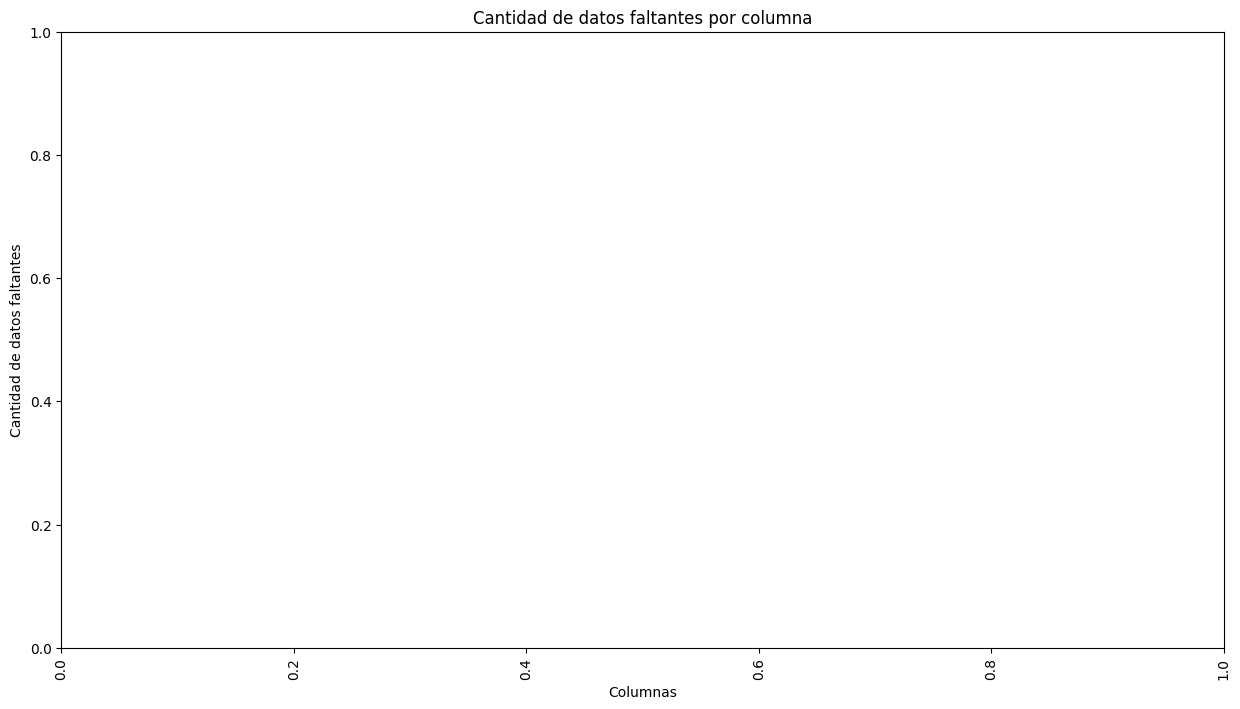

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la cantidad de datos NA por columna
all_data_NA = speep.isna().sum()

# Filtrar solo las columnas que tienen datos NA
all_data_NA = all_data_NA[all_data_NA > 0].sort_values(ascending=False)

# Graficar
plt.figure(figsize=(15, 8))
sns.barplot(x=all_data_NA.index, y=all_data_NA.values)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visualización
plt.ylabel('Cantidad de datos faltantes')
plt.xlabel('Columnas')
plt.title('Cantidad de datos faltantes por columna')
plt.show()

IndexError: index 16 is out of bounds for axis 0 with size 16

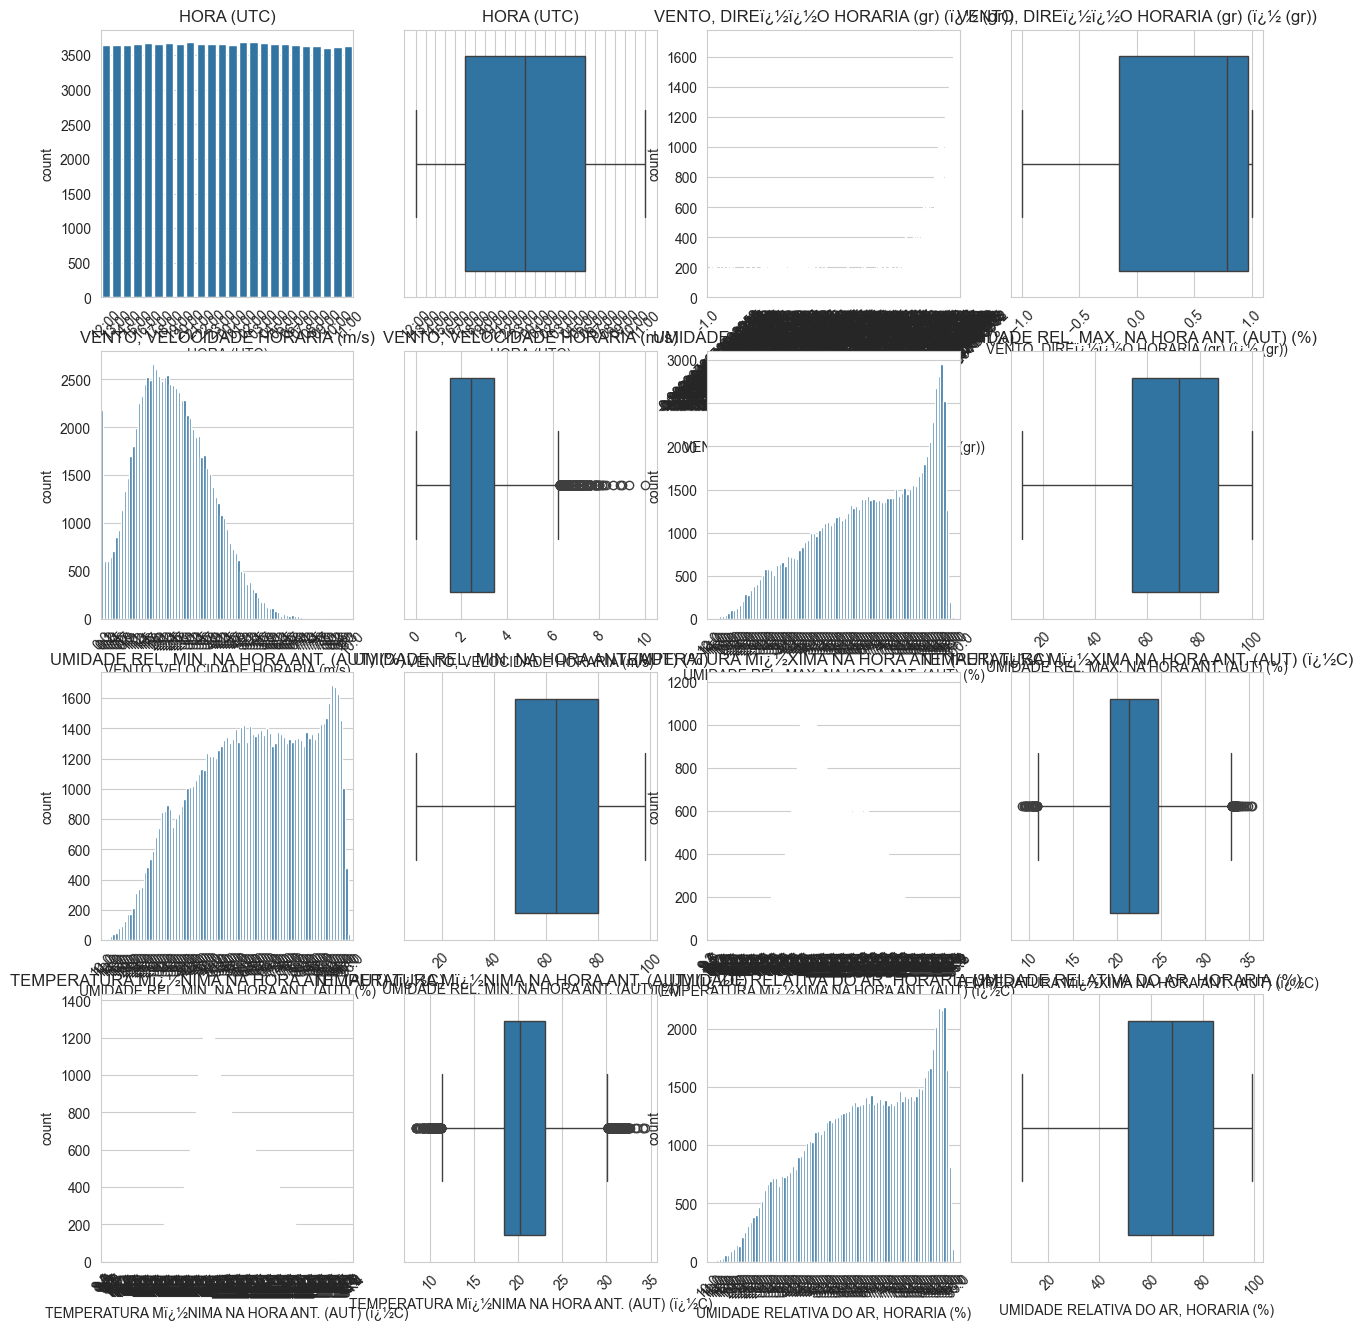

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tu DataFrame se llama df

# Establecer el estilo de Seaborn
sns.set_style("whitegrid")

# Definir el número de filas y columnas para la matriz de gráficos
n_cols = 4  # Puedes ajustar esto según tus preferencias
n_rows = len(speep.columns) // n_cols + (len(speep.columns) % n_cols > 0)

# Crear una figura grande
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))

# Aplanar la matriz de ejes para iterar sobre ella
axes = axes.ravel()

# Iterar sobre cada columna y eje
for i, column in enumerate(speep.columns):
    # Diagrama de barras
    sns.countplot(data=speep, x=column, ax=axes[2*i])
    axes[2*i].set_title(f'{column}')
    axes[2*i].tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x si es necesario

    # Boxplot
    sns.boxplot(data=speep, x=column, ax=axes[2*i + 1])
    axes[2*i + 1].set_title(f'{column}')
    axes[2*i + 1].tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x si es necesario

# Eliminar ejes sobrantes si no son múltiplos exactos de n_cols
for j in range(i*2 + 2, n_cols * n_rows):
    fig.delaxes(axes[j])

plt.tight_layout()  # Ajustar layout
plt.show()


In [20]:

column_names = speep.columns.tolist()

column_names


['HORA (UTC)',
 'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))',
 'VENTO, VELOCIDADE HORARIA (m/s)',
 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
 'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)',
 'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)',
 'UMIDADE RELATIVA DO AR, HORARIA (%)',
 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
 'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)',
 'VENTO, RAJADA MAXIMA (m/s)',
 'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
 'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)']

In [25]:
new_column_names = ['HORA (UTC)',
 'VENTO, DIREC HORARIA',
 'VENTO, VELOCIDADE HORARIA (m/s)',
 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
 'TEMPERATURA MAX  HORA ANT',
 'TEMPERATURA MIN NA HORA ANT',
 'UMIDADE RELATIVA DO AR, HORARIA (%)',
 'PRESSAO ATMOSFERICA A NIVEL',
 'PRECIPITAION TOTAL',
 'VENTO, RAJADA MAXIMA (m/s)',
 'PRESSION ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
 'PRESSION ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)']
speep.columns = new_column_names

# Verificar el cambio
print(speep.columns)


Index(['HORA (UTC)', 'VENTO, DIREC HORARIA', 'VENTO, VELOCIDADE HORARIA (m/s)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)', 'TEMPERATURA MAX  HORA ANT',
       'TEMPERATURA MIN NA HORA ANT', 'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'PRESSAO ATMOSFERICA A NIVEL', 'PRECIPITAION TOTAL',
       'VENTO, RAJADA MAXIMA (m/s)',
       'PRESSION ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSION ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'],
      dtype='object')


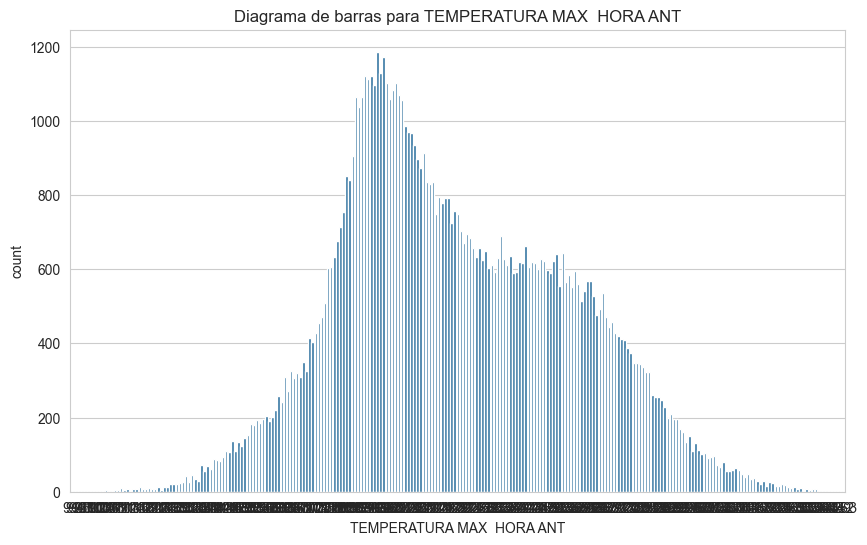

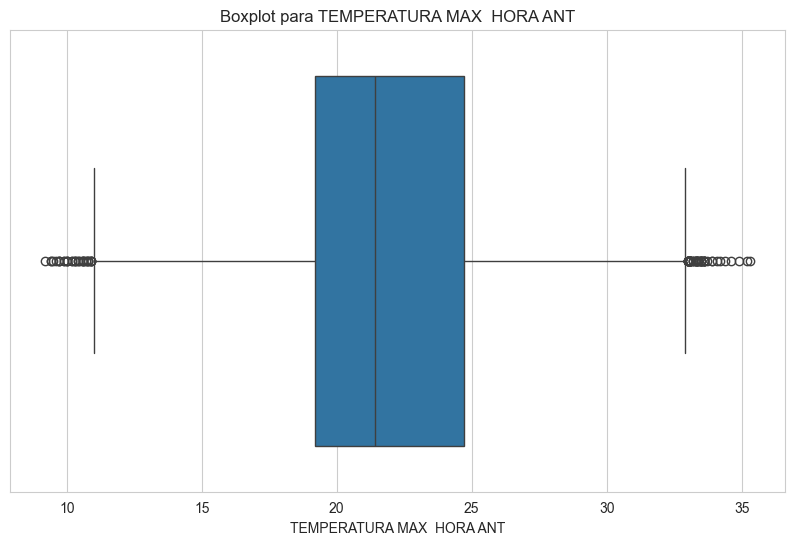

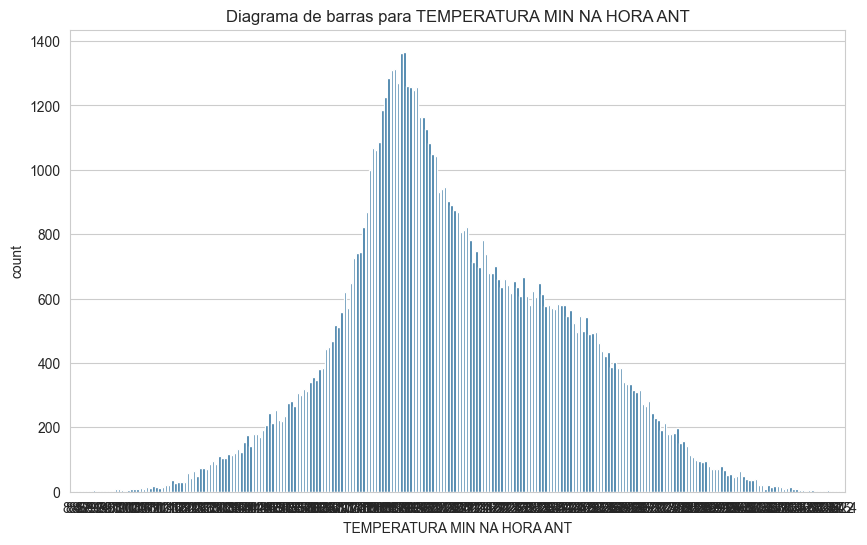

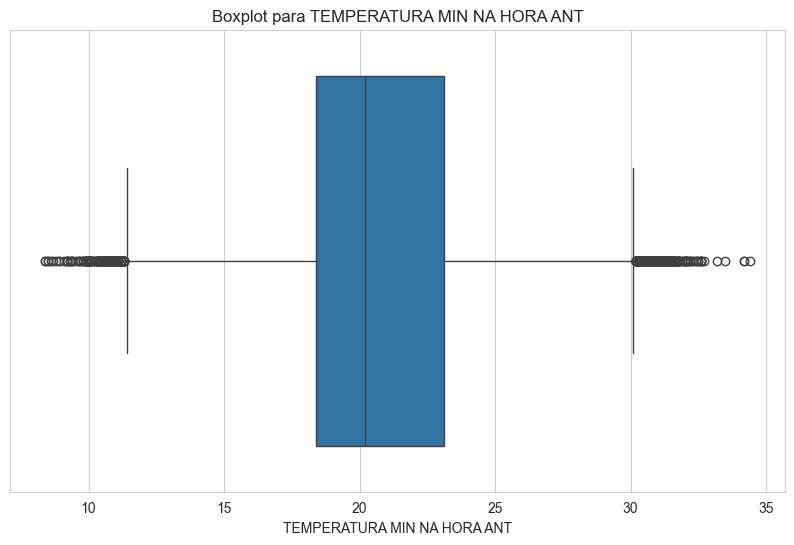

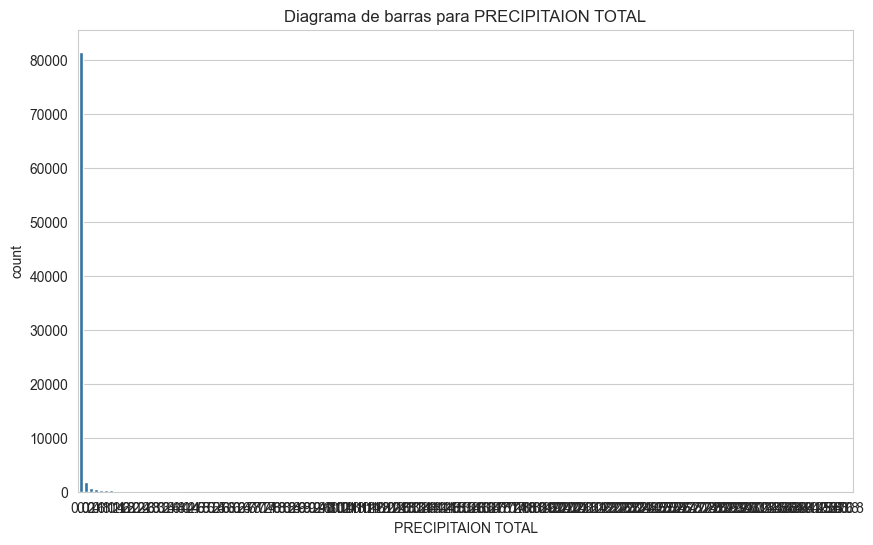

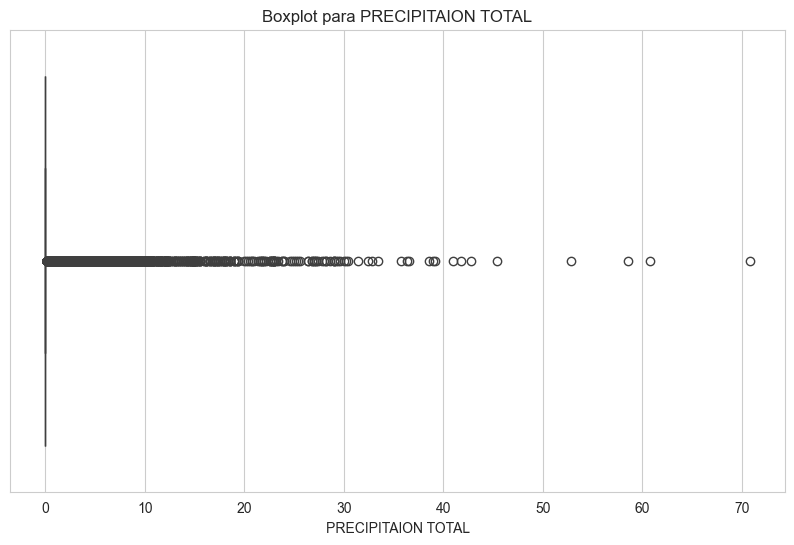

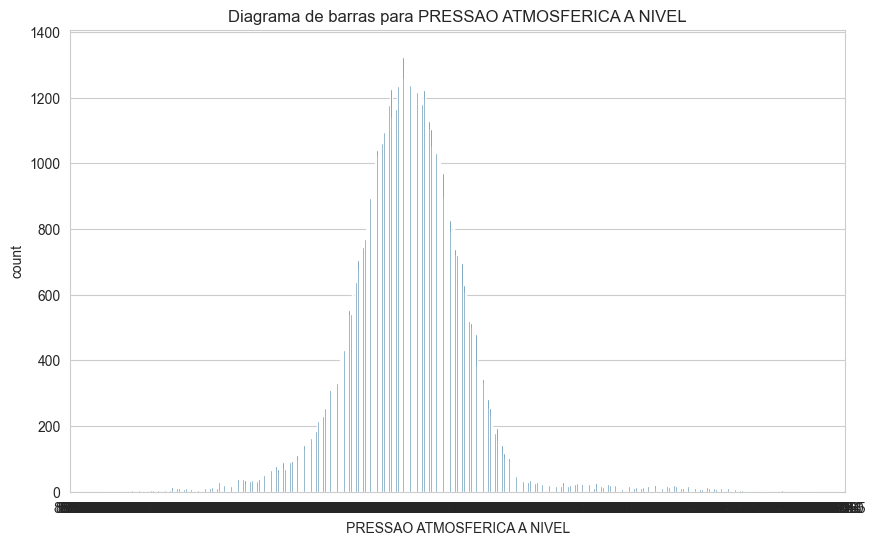

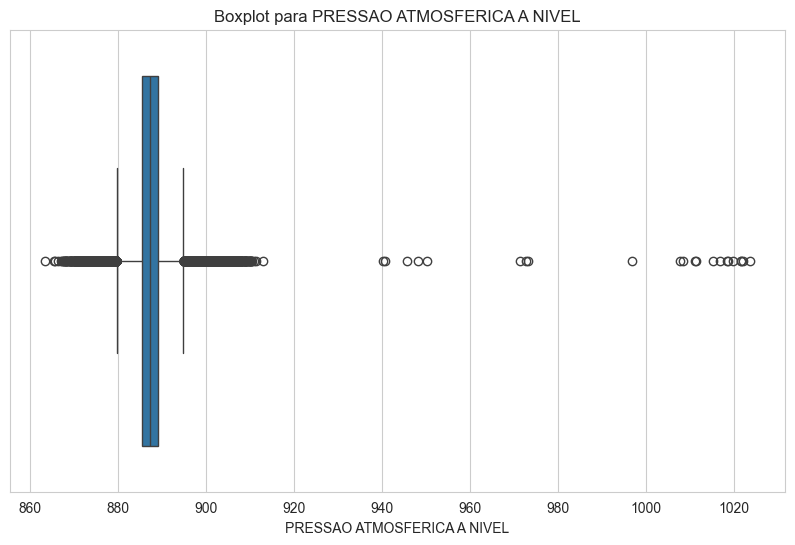

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


columns_to_plot = ['TEMPERATURA MAX  HORA ANT', 'TEMPERATURA MIN NA HORA ANT', 'PRECIPITAION TOTAL', 'PRESSAO ATMOSFERICA A NIVEL']

for column_name in columns_to_plot:
    # Diagrama de barras
    plt.figure(figsize=(10, 6))
    sns.countplot(data=speep, x=column_name)
    plt.title(f'Diagrama de barras para {column_name}')
    plt.show()

    # Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=speep, x=column_name)
    plt.title(f'Boxplot para {column_name}')
    plt.show()


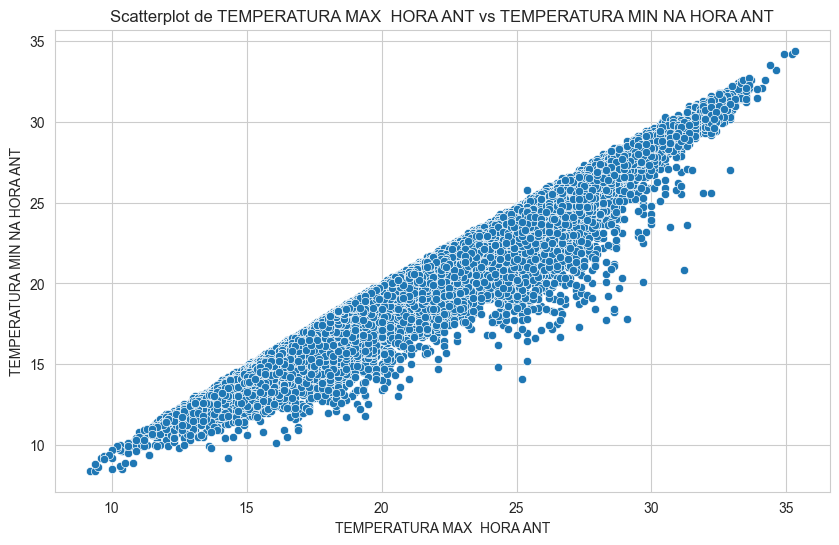

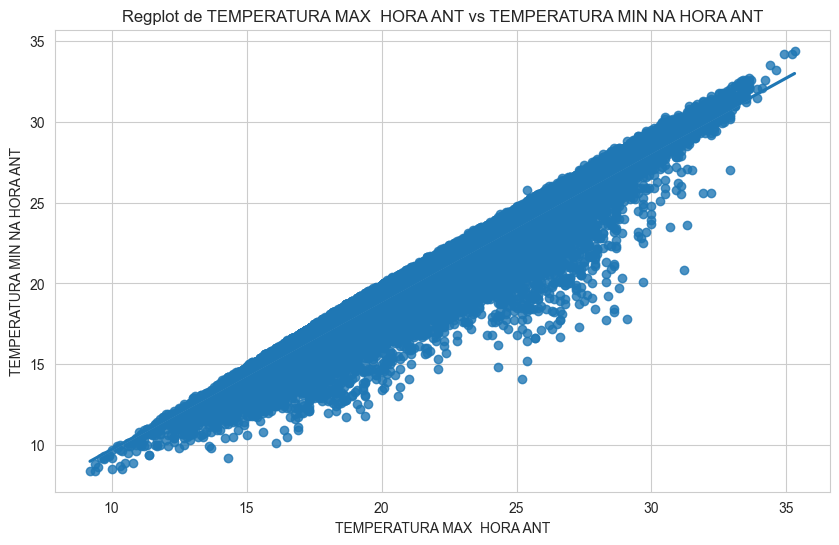

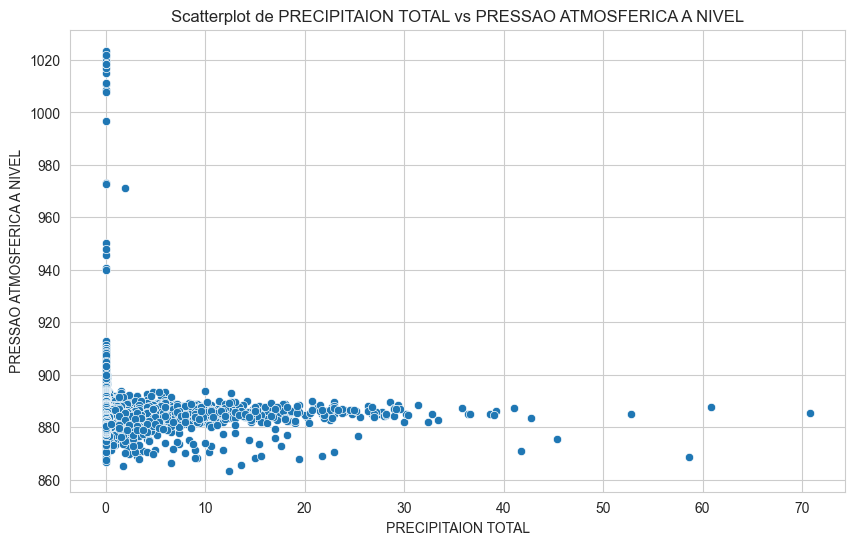

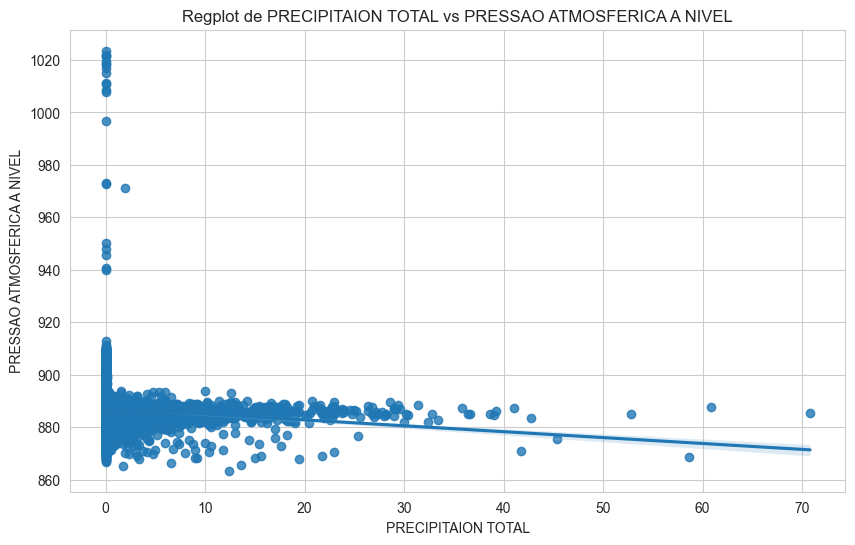

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tu DataFrame se llama speep
# y quieres graficar las relaciones entre 'col1' y 'col2', y entre 'col3' y 'col4'
pairs_to_plot = [('TEMPERATURA MAX  HORA ANT', 'TEMPERATURA MIN NA HORA ANT'), ('PRECIPITAION TOTAL', 'PRESSAO ATMOSFERICA A NIVEL')]

for x_col, y_col in pairs_to_plot:
    # Scatterplot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=speep, x=x_col, y=y_col)
    plt.title(f'Scatterplot de {x_col} vs {y_col}')
    plt.show()

    # Regplot (scatterplot con línea de regresión)
    plt.figure(figsize=(10, 6))
    sns.regplot(data=speep, x=x_col, y=y_col)
    plt.title(f'Regplot de {x_col} vs {y_col}')
    plt.show()


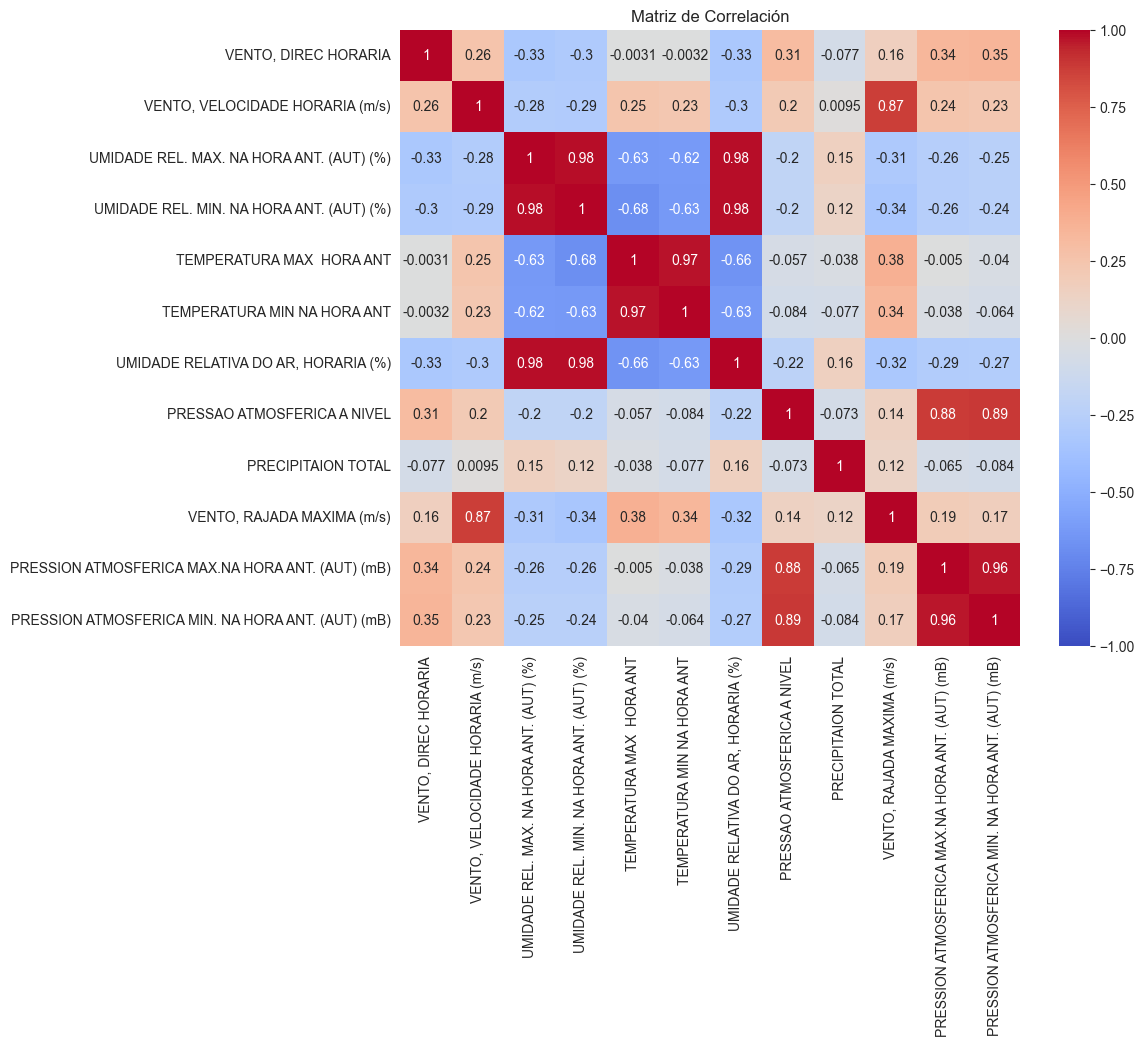

In [32]:
# 1. Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# 3. Selecciona las columnas que deseas incluir
# Supongamos que tu DataFrame tiene columnas A, B, C, D y E, y quieres excluir B y D
columnas_a_incluir = [col for col in speep.columns if col not in ['HORA (UTC)',
]]
df_seleccionado = speep[columnas_a_incluir]

# 4. Calcula la matriz de correlación
correlation_matrix = df_seleccionado.corr()

# 5. Visualiza la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()




Vemos la correlacion  y podemos elimiar a las que se parecen